In [3]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt
import time
import math

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Find the polynomial coefficients for triangle Hofstadter model
# with vector potential Ay=(p/q)*2pi*x and non-Hermitian term delta
# with momentum in y direction ky
def pk(p,q,delta,ky):
    if q > 200:
        mpmath.mp.dps = 80
    # brute forcely calculate pk for k=1,2,3,4
    A = (mpmath.mpf(1) + delta)/(mpmath.mpf(1) - delta)
    B = (mpmath.mpf(1) - delta)/(mpmath.mpf(1) + delta)
    if q == 1:
        T = 2+A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky))+B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        V = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
            mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        poly = [1,-V]
        poly_init = [1,-V]
        return poly,T,poly_init
    elif q == 2:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]
        poly = [1,-Vq[1]-Vq[2],-Tq[1]-Tq[2]+Vq[1]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2],-Tq[1]+Vq[1]*Vq[2]]
        return poly,T,poly_init
    elif q == 3:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]
        poly = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]+Tq[3]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]-Vq[1]*Vq[2]*Vq[3]]
        return poly,T,poly_init
    elif q == 4:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Vq[4] = mpmath.sqrt(A)*mpmath.exp(-1j*(8*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(8*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        Tq[4] = 2 + A*mpmath.exp(1j*(9*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(9*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]*Tq[4]
        poly = [mpmath.mpc(0)] * (q + 1)
        poly[0] = 1
        poly[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly[2] = -Tq[1]-Tq[2]-Tq[3]-Tq[4]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[3]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2])+Tq[4]*(Vq[2]+Vq[3])-Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly[4] = Vq[1]*Vq[3]*Vq[2]*Vq[4]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]-Tq[4]*Vq[2]*Vq[3]+Tq[1]*Tq[3]+Tq[2]*Tq[4]
        poly_init = [mpmath.mpc(0)] * (q + 1)
        poly_init[0] = 1
        poly_init[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly_init[2] = -Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly_init[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2]) \
                       -Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly_init[4] = Tq[1]*Tq[3]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]+Vq[1]*Vq[2]*Vq[3]*Vq[4]
        return poly,T,poly_init
    # for k >= 5 (k = q)
    else:
        Tq = [mpmath.mpf(0)] * (q + 1)
        Vq = [mpmath.mpf(0)] * (q + 1)
        for i in range(1,q+1):
            # store V_i and T_i
            Vq[i] = mpmath.sqrt(A)*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-ky))+ \
                    mpmath.sqrt(B)*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-ky))
            Tq[i] = 2 + A*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-ky))+ \
                    B*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-ky))
        # calculate coefficients of Delta_{1,k}
        Delta1 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{1,1} and Delta_{1,2}
        Delta1[1,1] = -Vq[1]
        Delta1[2,1] = -Vq[1]-Vq[2]
        Delta1[2,2] = Vq[1]*Vq[2]-Tq[1]
        # recursively calculate coefficients of Delta_{1,i} until i=k
        for i in range(3,q+1):
            Delta1[i,1] = Delta1[i-1,1] - Vq[i]
            Delta1[i,2] = Delta1[i-1,2] - Vq[i]*Delta1[i-1,1] - Tq[i-1]
            for k in range(3,i):
                Delta1[i,k] = Delta1[i-1,k] - Vq[i]*Delta1[i-1,k-1] - Tq[i-1]*Delta1[i-2,k-2]
            Delta1[i,i] = -Vq[i]*Delta1[i-1,i-1] - Tq[i-1]*Delta1[i-2,i-2]
        # calculate coefficients of Delta_{2,k-1}
        Delta2 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{2,2} and Delta_{2,3}
        Delta2[2,1] = -Vq[2]
        Delta2[3,1] = -Vq[2]-Vq[3]
        Delta2[3,2] = Vq[2]*Vq[3]-Tq[2]
        # recursively calculate coefficients of Delta_{2,i} until i=k-1
        for i in range(4,q):
            Delta2[i,1] = Delta2[i-1,1] - Vq[i]
            Delta2[i,2] = Delta2[i-1,2] - Vq[i]*Delta2[i-1,1] - Tq[i-1]
            for k in range(3,i-1):
                Delta2[i,k] = Delta2[i-1,k] - Vq[i]*Delta2[i-1,k-1] - Tq[i-1]*Delta2[i-2,k-2]
            Delta2[i,i-1] = -Vq[i]*Delta2[i-1,i-2] - Tq[i-1]*Delta2[i-2,i-3]
        # T=T1*T2*...*Tq
        T = 1
        for i in range(1,q+1):
            T = T*Tq[i]
        # poly1 = Delta_{1,q}
        poly1 = [1] + list(Delta1[q,1:])
        # poly2 = -Tq*Delta_{2,q-1}
        poly2 = [0,0] + [-Tq[q]] + [x * (-Tq[q]) for x in list(Delta2[q-1,1:q-1])]
        # pk = Delta_{1,q} - Tq*Delta_{2,q-1}
        poly = [x + y for x,y in zip(poly1,poly2)]
        # return pk,T,Dk=Delta_{1,q}
        return poly,T,poly1
    
# multiply of two polynomials with degree q
def polymul(poly1,poly2,q):
    poly = [mpmath.mpf(0)] * (2 * q + 1)
    for i in range(0, q + 1):
        for j in range(0, q + 1):
            poly[i + j] += poly1[i] * poly2[j]
    return poly

# use fraction with lower q to approxiamte i/100. i,e, 19/100->4/21
def find_nearest_fraction(x, max_denominator=250):
    min_diff = float('inf')
    best_fraction = None
    
    if x == 0:
        return (0,1)
    
    if x == 1:
        return (5,5)
    
    for q in range(1, max_denominator + 1):
        p = round(x * q)
        diff = abs(x - p / q)
        if diff < min_diff:
            min_diff = diff
            best_fraction = (p, q)
    
    return best_fraction

nums = 30 # number of p/q in the landau fan diagrams

# compute nH_Hofstadter_butterfly
# return p/q, real spectrum and imaginary spectrum
def nH_Hofstadter_LL(delta,ky,Q=450,N=450,dps=80,edge=False):
    start_time = time.time()
    mpmath.mp.dps = dps # set the precision dps=70
    nphi_array = [0] * int(2 * N * Q)
    real_spectrum_array = [0] * int(2 * N * Q)
    imag_spectrum_array = [0] * int(2 * N * Q)
    abs_spectrum_array = [0] * int(2 * N * Q)

    eigct = 0 # number of eigvals
    
    for i in range(0,nums):
        start_time_i = time.time()
        print(i,end=' ')
        mpmath.mp.dps = 80 # set the low precision
        # bulk OBC spectrum by solving pk(E)=2sqrt(T)sin(theta)
        if i in [1]: # find_nearest_fraction not work well for these i
            gcd = math.gcd(i,Q)
            p = round(i / gcd)
            q = round(Q / gcd)
        else:
            # use fraction with lower q to approxiamte i/100
            p,q = find_nearest_fraction(i/Q)
        poly,T,poly_init = pk(p,q,delta,ky) # solve pk,T,Dk
        if q > 150:
            nn = 1
        else:
            nn = int(round(N / q)) # number of theta choices
        # set the precision depend on polynomial degrees
        if q > 200:
            extra_prec = 400
        elif q > 100:
            extra_prec = 250
        else:
            extra_prec = 200
        t = 2*mpmath.sqrt(T) # t = 2sqrt(T)
        poly_temp = poly[:] # 不能使用poly_temp = poly，这样poly_temp和poly指向同一个对象，修改poly_temp会同时修改poly
        for j in range(0,nn):
            chebyshev_root = mpmath.cos(j * mpmath.pi / (nn + 1))
            poly_temp[q] = poly[q] - t*chebyshev_root
            # solve pk(E)=2sqrt(T)sin(theta) for sin(theta) = chebyshev_root
            roots = mpmath.polyroots(poly_temp,maxsteps=1000,extraprec=extra_prec)
            # store the real part and imaginary part of spectrum
            roots_real = [x.real for x in roots]
            roots_imag = [x.imag for x in roots]
            roots_abs = [mpmath.fabs(x) for x in roots]
            nphi_array[eigct: eigct+q+1] = [p/q] * q
            real_spectrum_array[eigct: eigct+q+1] = roots_real
            imag_spectrum_array[eigct: eigct+q+1] = roots_imag
            abs_spectrum_array[eigct: eigct+q+1] = roots_abs
            eigct = eigct + q
        # avoid to calculate edge OBC spectrum if q is large
        if q < 100 and q > 1 and edge == True:
            # edge OBC spectrum
            mpmath.mp.dps = 100 # raise the precision since polynomial degree is higher
            Dk_square = polymul(poly_init,poly_init,q) # Dk*Dk
            Dkpk = polymul(poly_init,poly,q) # Dk*pk
            poly_edge = [x - y for x,y in zip(Dk_square,Dkpk)] # Dk*Dk-Dk*pk
            # drop the terms with zero coefficients
            index = 0
            while mpmath.fabs(poly_edge[index]) < 0.000001:
                index = index + 1
            poly_edge = poly_edge[index:]
            # poly_edge = Dk*Dk-Dk*pk+T
            poly_edge[-1] = poly_edge[-1] + T
            # solve Dk*Dk-Dk*pk+T=0
            roots_edge = mpmath.polyroots(poly_edge,maxsteps=1000,extraprec=400)
            # Check whether roots of Dk*Dk-Dk*pk+T satisfy the following condition:
            # Dk=x_+(E), |x_+(E)|<|x_-(E)| or Dk=x_-(E), |x_-(E)|<|x_+(E)|
            # where x_\pm(E)=(pk(E)^2\pm\sqrt(pk(E)^2-4*T))
            for root in roots_edge:
                pk_root_value = mpmath.polyval(poly,root) # pk(E)
                Dk_root_value = mpmath.polyval(poly_init,root) # Dk(E)
                # x_+(E)
                x1 = mpmath.mpf('0.5')*(pk_root_value + mpmath.sqrt(pk_root_value**2 - mpmath.mpf(4)*T))
                # x_-(E)
                x2 = pk_root_value - x1
                # if Dk(E)=x_+(E) and |x_+(E)|<|x_-(E)|
                if mpmath.fabs(Dk_root_value - x1) < 0.0001 and mpmath.fabs(x1) < mpmath.fabs(x2):
                    nphi_array[eigct] = p/q
                    real_spectrum_array[eigct] = root.real
                    imag_spectrum_array[eigct] = root.imag
                    abs_spectrum_array[eigct] = mpmath.fabs(root)
                    eigct = eigct + 1
                # if Dk(E)=x_-(E) and |x_-(E)|<|x_+(E)|
                elif mpmath.fabs(Dk_root_value - x2) < 0.0001 and mpmath.fabs(x2) < mpmath.fabs(x1):
                    nphi_array[eigct] = p/q
                    real_spectrum_array[eigct] = root.real
                    imag_spectrum_array[eigct] = root.imag
                    abs_spectrum_array[eigct] = mpmath.fabs(root)
                    eigct = eigct + 1
                    
        end_time_i = time.time()
        print(f"time consuming: {end_time_i-start_time_i}")
    
    nphi_array = nphi_array[0:eigct]
    real_spectrum_array = real_spectrum_array[0:eigct]
    imag_spectrum_array = imag_spectrum_array[0:eigct]
    abs_spectrum_array = abs_spectrum_array[0:eigct]
    end_time = time.time()
    print(f"total time consuming: {end_time - start_time}")
    return nphi_array,real_spectrum_array,imag_spectrum_array,abs_spectrum_array

In [4]:
phi_modulus_array,real_spectrum_array,imag_spectrum_array,abs_spectrum_array=nH_Hofstadter_LL(ky=mpmath.mpf('0')*mpmath.pi,delta=mpmath.mpf('0.2'))

0 time consuming: 0.29894423484802246
1 time consuming: 5525.989255666733
2 time consuming: 493.27394104003906
3 time consuming: 368.4924178123474
4 time consuming: 517.6834540367126
5 time consuming: 107.2112250328064
6 time consuming: 76.1986472606659
7 time consuming: 314.45861315727234
8 time consuming: 532.695573091507
9 time consuming: 37.23433566093445
10 time consuming: 27.822099685668945
11 time consuming: 712.1577641963959
12 time consuming: 115.27044081687927
13 time consuming: 245.40332055091858
14 time consuming: 5269.05011844635
15 time consuming: 14.969425201416016
16 time consuming: 566.2496554851532
17 time consuming: 658.4936311244965
18 time consuming: 9.411306858062744
19 time consuming: 677.269011259079
20 time consuming: 41.32834267616272
21 time consuming: 517.259530544281
22 time consuming: 572.0671451091766
23 time consuming: 393.66978764533997
24 time consuming: 130.96195125579834
25 time consuming: 6.448925971984863
26 time consuming: 565.856823682785
27 time

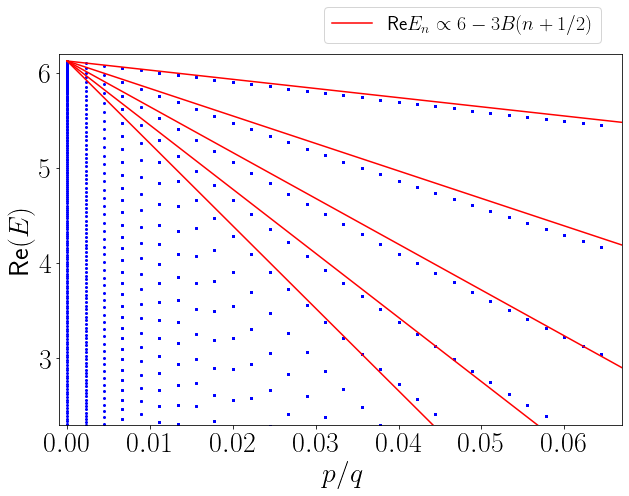

In [50]:
plt.figure(figsize=(9, 7))

plots = [0] * 7
plots[0], = plt.plot(phi_modulus_array, real_spectrum_array, 'bo', markersize=2)
plt.ylabel(r'$\text{Re}(E)$',fontsize=28)
plt.xlabel(r'$p/q$',fontsize=28)
#plt.text(0.45,5,r'$\delta=0.2$',fontsize=28)
x = np.arange(0, 0.068, 0.001)
y1 = (6-1.5*2*mpmath.pi*x)/(np.sqrt(1-0.2*0.2))
y2 = (6-4.5*2*mpmath.pi*x)/(np.sqrt(1-0.2*0.2))
y3 = (6-7.5*2*mpmath.pi*x)/(np.sqrt(1-0.2*0.2))
y4 = (6-10.5*2*mpmath.pi*x)/(np.sqrt(1-0.2*0.2))
y5 = (6-13.5*2*mpmath.pi*x)/(np.sqrt(1-0.2*0.2))
plots[1], = plt.plot(x,y1,color='red')
plots[2], = plt.plot(x,y2,color='red')
plots[3], = plt.plot(x,y3,color='red')
plots[4], = plt.plot(x,y4,color='red')
plots[5], = plt.plot(x,y5,color='red')
plt.xticks(fontsize=28)
plt.yticks([3,4,5,6],fontsize=28)
plt.xlim([-0.001,0.067])
plt.ylim([2.3,6.2])
plt.legend(handles = [plots[1]],labels = [r'Re$E_n\propto 6-3B(n+1/2)$'],fontsize = 20, loc = 'lower left',bbox_to_anchor=(0.47, 1.03),borderaxespad=0)
plt.tight_layout()# adjust the fig to avoid cut off in ylabel

plt.savefig('nH_Hofstadter_Q_450_delta_0_2_ky_0_LL_fitting.pdf')

plt.show()